In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import random
import json
import community as community_louvain

import numpy as np

import numpy as np
from scipy.sparse import csr_matrix

# 设置随机种子
random.seed(42)
np.random.seed(42)
from networkx.algorithms.community import girvan_newman

In [2]:

def read_directed_graph(file_path, skip_lines):
    G = nx.DiGraph()  # Initialize an empty directed graph
    with open(file_path, 'r') as file:
        for _ in range(skip_lines):
            next(file)  # Skip the initial descriptive lines
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:  # Only consider lines with exactly two node identifiers
                u, v = parts
                G.add_edge(u, v)
    
    return G


path = '/Users/qing/Desktop/24s1/comp8880/project/code/data/soc/soc-twitter-follows-mun.edges'
G = read_directed_graph(path,0)


In [3]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

num_nodes, num_edges

(465017, 834798)

In [4]:
with open('saved/network_metrics_twit.json', 'r') as f:
    loaded_data = json.load(f)

# 访问加载的数据
sorted_centrality = loaded_data["Centrality"]
sorted_pagerank =  loaded_data["PageRank"]
sorted_leaderRank =  loaded_data["LeaderRank"]
sorted_hIndex =  loaded_data["HIndex"]
sorted_kShell=  loaded_data["KShell"]
# 更多的访问可以根据需要添加


In [5]:

print(sorted_centrality[:3])
print(sorted_pagerank[:3])
print(sorted_leaderRank[:3])
print(sorted_hIndex[:3])
print(sorted_kShell[:3])


[['643', 0.0014580143478934058], ['3580', 0.0013289865294957592], ['6389', 0.0012752249384967399]]
[['5486', 5.815901949527958e-06], ['643', 5.584072735520935e-06], ['21275', 5.434069603243831e-06]]
[['5486', 1.3421453463347993e-06], ['643', 1.2598727423649622e-06], ['21275', 1.0836062439510285e-06]]
[['17603', 66], ['24025', 64], ['78674', 64]]
[['120', 30], ['168', 30], ['170', 30]]


In [6]:
G_edge = nx.read_edgelist('/Users/qing/Desktop/24s1/comp8880/project/code/data/soc/soc-twitter-follows-mun.edges')  # 加载您的网络数据

In [16]:

# 计算并排序度中心性
#degree_centrality = nx.degree_centrality(G)

#leaderRank = leader_rank(G)
# 社区感知排名
budget = 20 # 选择前5个节点
top_nodes_community_aware = community_aware_ranking_sorted_2(centrality,centrality, partition, budget)
print("Top nodes selected by community-aware ranking:", top_nodes_community_aware)

Top nodes selected by community-aware ranking: ['22475', '17314', '13907', '52639', '33965', '6679', '28963', '7011', '30430', '6684', '11634', '11447', '9244', '8607', '76585', '6699', '5648', '32241', '9296', '16738']


In [12]:

# 计算并排序度中心性
#degree_centrality = nx.degree_centrality(G)

#leaderRank = leader_rank(G)
# 社区感知排名
budget = 50 # 选择前5个节点

top_nodes_community_aware_connectivity = community_aware_centrality_ranking3(G_edge, partition, centrality, budget)

print("Top nodes selected by community-aware ranking:", top_nodes_community_aware_connectivity)

Top nodes selected by community-aware ranking: ['7839', '36870', '10392', '6684', '19941', '13907', '75441', '5648', '27619', '10490', '17314', '32241', '11277', '10472', '16738', '33965', '6619', '11634', '6679', '55202', '76585', '30430', '44542', '27660', '11447', '20710', '22475', '52639', '12816', '30404', '63454', '9472', '7011', '28963', '9296', '56491', '8607', '36018', '57837', '33016', '9244', '47453', '84381', '14636', '6699', '44809', '19904', '190', '13116', '69236']


In [27]:
partition['2481']

0

In [25]:
sorted_centrality

[['2481', 0.06522835093524994],
 ['394', 0.05848059049367236],
 ['4675', 0.05749815793895991],
 ['377', 0.04488165565738957],
 ['225', 0.044106051008932376],
 ['34', 0.04009876032523688],
 ['4697', 0.03211003244612779],
 ['5050', 0.02467715456507969],
 ['46', 0.023513747592393903],
 ['3450', 0.023125945268165308],
 ['5398', 0.02161351620367378],
 ['8861', 0.0214971755064052],
 ['217', 0.02141961504155948],
 ['2470', 0.02116108015874042],
 ['5245', 0.01919621504931553],
 ['2813', 0.01742525110200494],
 ['5057', 0.017179642963326826],
 ['2811', 0.017127935986763012],
 ['5715', 0.01686940110394395],
 ['6139', 0.01663671970940679],
 ['2539', 0.016326477850023915],
 ['2863', 0.016055016223063896],
 ['381', 0.01602916273478199],
 ['403', 0.015809408084385784],
 ['3451', 0.015525019713284814],
 ['143', 0.015318191807029563],
 ['7462', 0.015292338318747656],
 ['7669', 0.015279411574606704],
 ['400', 0.015214777853901938],
 ['1521', 0.01498209645936478],
 ['5198', 0.014814048785532387],
 ['15',

In [7]:
def community_aware_ranking(G, partition, node_centrality, budget=None):
    # Organize nodes by community and sort them within each community based on their centrality
    community_nodes = {}
    for node, comm in partition.items():
        if comm not in community_nodes:
            community_nodes[comm] = []
        community_nodes[comm].append(node)

    for comm in community_nodes:
        community_nodes[comm].sort(key=lambda x: node_centrality[x], reverse=True)

    # Select nodes from communities ensuring distribution across communities
    ranked_nodes = []
    if budget is None:
        budget = len(G)
    
    while budget > 0 and any(community_nodes.values()):
        for comm in sorted(community_nodes, key=lambda x: len(community_nodes[x]), reverse=True):
            if community_nodes[comm]:
                ranked_nodes.append(community_nodes[comm].pop(0))
                budget -= 1
                if budget == 0:
                    break
    
    return ranked_nodes

In [8]:
def community_aware_ranking_ours_v4(partition, leader_rank_scores, community_kshell, budget=10, alpha=2):
    # Organize nodes by community and sort them within each community based on their centrality
    community_nodes = {}
    for node, comm in partition.items():
        if comm not in community_nodes:
            community_nodes[comm] = []
        community_nodes[comm].append(node)

    for comm in community_nodes:
        community_nodes[comm].sort(key=lambda x: leader_rank_scores[x], reverse=True)

    # Calculate total k-shell values for each community to determine budget distribution
    community_kshell_sums = {}
    for node, comm in partition.items():
        if comm not in community_kshell_sums:
            community_kshell_sums[comm] = 0
        community_kshell_sums[comm] += community_kshell[node]

    # Calculate total k-shell values across all communities to normalize the distribution
    total_kshell_sum = sum(community_kshell_sums.values())

    # Determine budget for each community based on their k-shell sum raised to the power alpha
    community_budgets = {comm: int(((community_kshell_sums[comm] / total_kshell_sum) ** alpha) * budget) for comm in community_nodes}

    # Adjust budgets due to integer rounding, distribute any remaining budget
    allocated_budget = sum(community_budgets.values())
    while allocated_budget < budget:
        for comm in sorted(community_budgets, key=lambda x: community_kshell_sums[x], reverse=True):
            community_budgets[comm] += 1
            allocated_budget += 1
            if allocated_budget == budget:
                break

    # Select nodes from communities based on assigned budgets
    ranked_nodes = []
    for comm in sorted(community_nodes, key=lambda x: community_kshell_sums[x], reverse=True):
        ranked_nodes.extend(community_nodes[comm][:community_budgets[comm]])

    return ranked_nodes


In [9]:
import infomap

In [10]:
# 创建节点映射，将节点字符串映射为整数，同时创建反向映射
node_map = {node: i for i, node in enumerate(G.nodes())}
reverse_node_map = {i: node for node, i in node_map.items()}  # 反向映射

# 初始化 Infomap
im = infomap.Infomap()

# 将网络数据添加到 Infomap 对象，确保节点ID是整数
for edge in G.edges():
    source, target = edge
    im.add_link(node_map[source], node_map[target])

# 运行 Infomap 算法
im.run()


  Infomap v2.7.1 starts at 2024-05-23 15:18:40
  -> Input network: 
  -> No file output!
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 465017 nodes and 834798 links...
  -> One-level codelength: 15.4855172

Trial 1/1 starting at 2024-05-23 15:18:42
Two-level compression: 33% 0.49% 0.00238975026% 0.0292713174% 
Partitioned to codelength 4.2884848 + 5.97550254 = 10.26398734 in 2179 (2174 non-trivial) modules.
Super-level compression: 0.45026712% to codelength 10.21777198 in 52 top modules.

Recursive sub-structure compression: 27.4963772% 0.0292279525% 0% 

In [11]:

# 提取社区分区结果，直接使用反向映射
partition_infomap = {}
for node in im.tree:
    if node.is_leaf:
        original_node = reverse_node_map[node.node_id]  # 直接使用反向映射查找原始节点标识符
        partition_infomap[original_node] = node.module_id

In [12]:
import networkx as nx
import numpy as np
import community as community_louvain

def community_aware_ranking_ours_v5(G, partition, incommunity, communityImportance, total_budget):
    """
    对社交网络进行资源分配和节点选择，结合社区划分、节点度中心性、k-shell得分和距离阈值。
    使用线性归一化来代替Softmax进行预算分配。

    参数:
    G: NetworkX图对象，表示社交网络。
    partition: 字典，节点到社区ID的映射。
    incommunity: 字典，节点的xxxxx得分用作社区内排名
    communityImportance: 字典，节点的xxxx得分。用作社区安权重
    total_budget: 整个网络的总预算，表示可以选择的节点总数。
    alpha: k-shell得分的权重。
    beta: 社区大小得分的权重。
    distance_threshold: 最短路径距离阈值，用于确定节点间的紧密程度。

    返回:
    selected_nodes: 被选择的节点集合。
    """

    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    community_scores = {}
    for comm_id, nodes in communities.items():
        core_score = np.mean([communityImportance[node] for node in nodes])  # 计算该社区的平均k-shell得分
        size_score = len(nodes)  # 获取社区的大小
        community_scores[comm_id] = size_score * (core_score*1.2)
    #print("Community Scores:", community_scores)

    # 使用线性归一化来分配预算
    total_score = sum(community_scores.values())
    community_budgets = {comm: int((score / total_score) * total_budget) for comm, score in community_scores.items()}

   # print(community_budgets)
    # 选择节点，考虑节点间的距离阈值
    selected_nodes = set()
    for comm_id in communities:
        community_nodes = communities[comm_id]
        budget = community_budgets[comm_id]
        selected_for_comm = []

        # 按度中心性排序
        nodes_sorted = sorted(community_nodes, key=lambda n: incommunity[n], reverse=True)

        for node in nodes_sorted:
            if len(selected_for_comm) < budget:
                selected_for_comm.append(node)
                selected_nodes.add(node)
                    
    return selected_nodes



In [13]:
def community_aware_ranking_ours_v6(G, partition, incommunity, total_budget):
    # Step 1: Organize nodes into communities
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    # Step 2: Compute community scores
    community_scores = {}
    for comm_id, nodes in communities.items():
        internal_edges = G.subgraph(nodes).size()  # Number of edges within the community
        size = len(nodes)
        external_connections = {}  # Initialize as a dictionary

        for node in nodes:
            for neighbor in G.neighbors(node):
                if partition[neighbor] != comm_id:
                    if partition[neighbor] not in external_connections:
                        external_connections[partition[neighbor]] = 0
                    external_connections[partition[neighbor]] += 1

        # Score calculation based on internal structure and external community sizes
        score = size 
        for ext_comm_id, conn_count in external_connections.items():
            score += conn_count * len(communities[ext_comm_id])

        community_scores[comm_id] = score

    print(community_scores)
    # Step 3: Rank communities by score
    ranked_communities = sorted(community_scores.items(), key=lambda item: item[1], reverse=True)
    ranked_community_ids = [comm_id for comm_id, _ in ranked_communities]

    # Step 4: Allocate budget cyclically, selecting nodes from ranked communities
    selected_nodes = set()
    remaining_budget = total_budget
    # Sort nodes within each community by their importance
    for comm_id in ranked_community_ids:
        communities[comm_id].sort(key=lambda x: incommunity[x], reverse=True)

    # Cycle through communities until budget is exhausted
    index = 0
    while remaining_budget > 0:
        comm_id = ranked_community_ids[index % len(ranked_community_ids)]
        if communities[comm_id]:
            selected_nodes.add(communities[comm_id].pop(0))
            remaining_budget -= 1
        index += 1

    return selected_nodes


In [14]:
import networkx as nx
import numpy as np
import random

def community_aware_ranking_ours_v7(G, partition, incommunity, total_budget, beta):
    # Step 1: Organize nodes into communities
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    # Step 2: Compute community scores
    community_scores = {}
    total_score = 0
    for comm_id, nodes in communities.items():
        internal_edges = G.subgraph(nodes).size()
        size = len(nodes)
        external_connections = {}

        for node in nodes:
            for neighbor in G.neighbors(node):
                if partition[neighbor] != comm_id:
                    if partition[neighbor] not in external_connections:
                        external_connections[partition[neighbor]] = 0
                    external_connections[partition[neighbor]] += 1

        # Score calculation with external community sizes
        score = size
        for ext_comm_id, conn_count in external_connections.items():
            score += conn_count * len(communities[ext_comm_id])

        community_scores[comm_id] = score
        total_score += score

    # Adjust scores with beta parameter
    adjusted_scores = {comm_id: score**beta for comm_id, score in community_scores.items()}
    total_adjusted_score = sum(adjusted_scores.values())
    
    # Normalize scores to get probabilities
    probabilities = {comm_id: adjusted_score / total_adjusted_score for comm_id, adjusted_score in adjusted_scores.items()}
    print(probabilities)
    # Step 3: Allocate budget based on weighted random selection
    selected_nodes = set()
    community_ids = list(community_scores.keys())
    weights = [probabilities[comm_id] for comm_id in community_ids]

    while total_budget > 0 and sum(len(communities[comm_id]) for comm_id in community_ids) > 0:
        chosen_community = random.choices(community_ids, weights, k=1)[0]
        if communities[chosen_community]:
            chosen_node = communities[chosen_community].pop(0)  # Select the first node
            selected_nodes.add(chosen_node)
            total_budget -= 1

    return selected_nodes


In [15]:
indegree_centrality = nx.in_degree_centrality(G)

In [16]:
sorted_indegree_centrality = sorted(indegree_centrality.items(), key=lambda item: item[1], reverse=True)

In [17]:
kShell = nx.core_number(G)

In [21]:
leaderRank = leader_rank(G)

In [22]:
degree_centrality = nx.degree_centrality(G)

In [23]:
hIndex = calculate_h_index(G)

In [24]:

budget = 200


ranked_nodes_V6 = community_aware_ranking_ours_v6(G, partition_infomap,leaderRank, budget)



{1: 862683873, 2: 2910944177, 3: 630667104, 4: 435681262, 5: 304013211, 6: 471725433, 7: 586828212, 8: 305838637, 9: 313341772, 10: 201841684, 11: 216786142, 12: 159069567, 13: 203403973, 14: 167945984, 15: 43995857, 16: 88739671, 17: 46682196, 18: 22901837, 19: 187726111, 20: 87175677, 21: 87701817, 22: 165390177, 23: 146284974, 24: 103860815, 25: 67233704, 26: 72559907, 27: 80982239, 28: 122633739, 29: 56795689, 30: 43031133, 31: 85511901, 32: 14325426, 33: 31931198, 34: 43899802, 35: 10370284, 36: 42864434, 37: 32996725, 38: 48884292, 39: 7092048, 40: 21482343, 41: 55051503, 42: 31984840, 43: 51226652, 44: 6139051, 45: 23580910, 46: 11088006, 47: 16023932, 48: 3353214, 49: 2915186, 50: 1668337, 51: 1269888, 52: 9747294}


In [45]:
ranked_nodes_V7 = community_aware_ranking_ours_v7(G, partition_infomap,leaderRank, budget,1.5)

{1: 0.09071357160910182, 2: 0.5622708424423405, 3: 0.056701560985191336, 4: 0.032557276683261936, 5: 0.018977256691276596, 6: 0.03667994578174434, 7: 0.05089337172720817, 8: 0.01914843441641945, 9: 0.019857391123026702, 10: 0.010266231157459222, 11: 0.011427257721707964, 12: 0.0071824960478584585, 13: 0.010385655071056309, 14: 0.007792004276827382, 15: 0.001044750096763388, 16: 0.002992757092676044, 17: 0.0011418831487273987, 18: 0.00039237400404312854, 19: 0.009208349028982675, 20: 0.0029139878759776214, 21: 0.002940408260000859, 22: 0.007614814274140208, 23: 0.0063342372458930684, 24: 0.003789416455081491, 25: 0.001973673473094224, 26: 0.002212788081022333, 27: 0.0026090320693853263, 28: 0.0048619411972923385, 29: 0.0015323846959488215, 30: 0.0010105758580187091, 31: 0.002830965581199289, 32: 0.00019411364546668587, 33: 0.0006459777605203668, 34: 0.0010413305017380353, 35: 0.0001195585729138193, 36: 0.0010047092197560208, 37: 0.0006785799186105038, 38: 0.0012236261276905615, 39: 6.76

In [25]:
ranked_nodes_V5= community_aware_ranking_ours_v5(G, partition_infomap, indegree_centrality, hIndex, budget)

In [26]:
def calculate_cbc(G, community_dict):
    # 初始化每个节点的社区中心性为0
    cbc = {node: 0 for node in G.nodes()}
    
    # 计算每个社区的大小
    community_sizes = {}
    for node, community in community_dict.items():
        if community not in community_sizes:
            community_sizes[community] = 0
        community_sizes[community] += 1

    # 计算每个节点的社区中心性
    for node in G.nodes():
        community_links = {}
        for neighbor in G.neighbors(node):
            community = community_dict[neighbor]
            if community not in community_links:
                community_links[community] = 0
            community_links[community] += 1
        
        for community, links in community_links.items():
            cbc[node] += links / community_sizes[community]

    return cbc

In [27]:
community_baseline = calculate_cbc(G, partition_infomap)
sorted_community_baseline = sorted(community_baseline.items(), key=lambda item: item[1], reverse=True)


0.5570413441335509


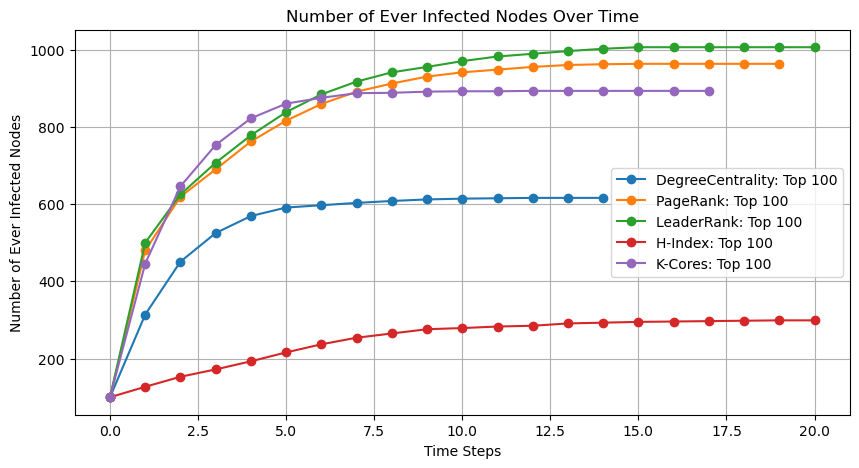

In [28]:

def plot_sir_simulation(G, sorted_maps, top, infection_prob=0.05, steps=100):
    plt.figure(figsize=(10, 5))

   
    avg_in_degree = sum(dict(G.in_degree()).values()) / G.number_of_nodes()
   
    recovery_prob = 1 / avg_in_degree
    print(recovery_prob)
    # Iterate through all sorted maps
    for name, sorted_map in sorted_maps.items():
        top_nodes = [node for node, _ in sorted_map[:top]]  # Extract top nodes
        history, ever_infected, infected_counts = SIR_simulation(G, top_nodes, infection_prob, recovery_prob, steps)
        plt.plot(infected_counts, marker='o', linestyle='-', label=f'{name}: Top {top}')

    plt.title('Number of Ever Infected Nodes Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Ever Infected Nodes')
    plt.grid(True)
    plt.legend()
    plt.show()

def SIR_simulation(G, initial_infected, infection_prob=0.1, recovery_prob=0.05, steps=100):
    # Initialize the status of each node
    status = {node: 'S' for node in G.nodes()}
    for node in initial_infected:
        status[node] = 'I'

    history = []
    ever_infected = set(initial_infected)
    infected_counts = [len(ever_infected)]  # Initial number of infected nodes

    # Simulation process
    for _ in range(steps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == 'I':
                # Determine neighbors based on whether the graph is directed
                if G.is_directed():
                    # For directed graphs, consider nodes that have edges towards 'node'
                    neighbors = [n for n in G.predecessors(node)]
                else:
                    # For undirected graphs, consider all neighbors
                    neighbors = list(G.neighbors(node))

                # Attempt to infect neighbors
                for neighbor in neighbors:
                    if status[neighbor] == 'S' and random.random() < infection_prob:
                        new_status[neighbor] = 'I'
                        ever_infected.add(neighbor)
                # Recovery process
                if random.random() < recovery_prob:
                    new_status[node] = 'R'
        history.append(new_status)
        status = new_status
        infected_counts.append(len(ever_infected))  # Record the total number of infected nodes

        if not any(s == 'I' for s in status.values()):
            break

    return history, ever_infected, infected_counts



sorted_maps = {
    #"CommunityAwareOurs": [(node, degree_centrality[node]) for node in ranked_nodes_V7],
    "DegreeCentrality": sorted_centrality,
    "PageRank": sorted_pagerank,
    "LeaderRank": sorted_leaderRank,
    "H-Index":sorted_hIndex,
    "K-Cores":sorted_kShell,
    #"CommunityBasedCentrality": sorted_community_baseline,
    
}


# 运行模拟并绘图
plot_sir_simulation(G, sorted_maps,top=100, infection_prob=0.1,steps=20)

In [35]:

# 统计前top节点在各社区中的分布
def count_top_nodes_in_communities(G, sorted_maps, top, partition):
    community_counts = {name: {} for name in sorted_maps.keys()}
    
    for name, sorted_map in sorted_maps.items():
        top_nodes = [node for node, _ in sorted_map[:top]]  # 提取前top个节点
        for node in top_nodes:
            community = partition[node]
            if community not in community_counts[name]:
                community_counts[name][community] = 0
            community_counts[name][community] += 1
    
    return community_counts

def plot_top_nodes_distribution(community_counts, top):
    plt.figure(figsize=(15, 10))
    # 获取所有唯一的社区并排序选择前50个
    all_communities = set()
    for counts in community_counts.values():
        all_communities.update(counts.keys())
    sorted_all_communities = sorted(all_communities)[:50]  # 选择前50个社区

    for i, (name, counts) in enumerate(community_counts.items()):
        # 创建一个长度为50的列表，对于每个社区，如果在counts中则填充相应的值，否则为0
        plot_values = [counts.get(community, 0) for community in sorted_all_communities]
        
        plt.subplot(3, 3, i + 1)
        plt.bar(sorted_all_communities, plot_values)
        plt.title(f'Distribution of Top {top} Nodes in Communities\n({name})')
        plt.xlabel('Community')
        plt.xticks(rotation=90)  # 旋转x轴标签，以便更好地显示
        plt.ylabel('Number of Top Nodes')

    plt.tight_layout()
    plt.show()


# 统计每个社区的节点数量并排序
def count_and_sort_communities(partition):
    community_counts = {}
    for node, community in partition.items():
        if community not in community_counts:
            community_counts[community] = 0
        community_counts[community] += 1
    
    # 按照节点数量排序社区
    sorted_community_counts = sorted(community_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_community_counts

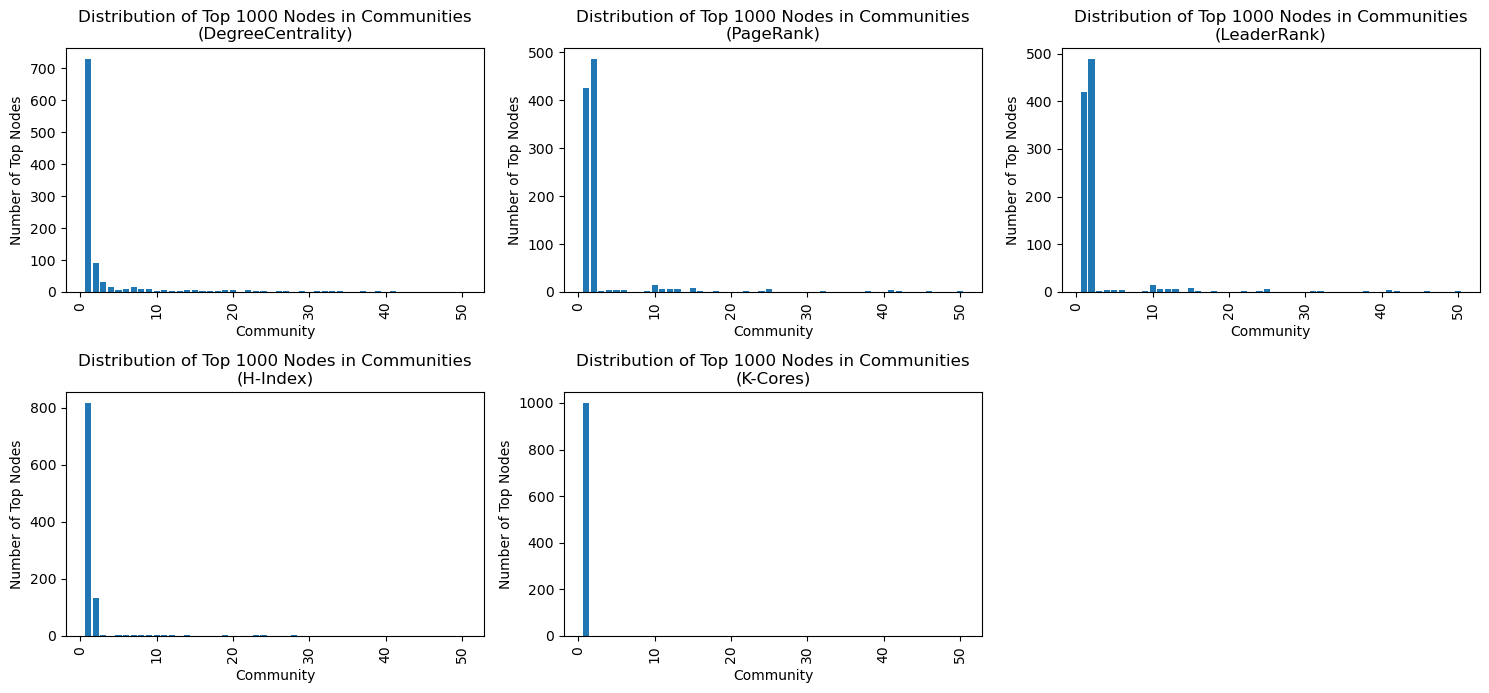

In [36]:

top = 1000

community_counts = count_top_nodes_in_communities(G, sorted_maps, top, partition_infomap)
plot_top_nodes_distribution(community_counts, top)

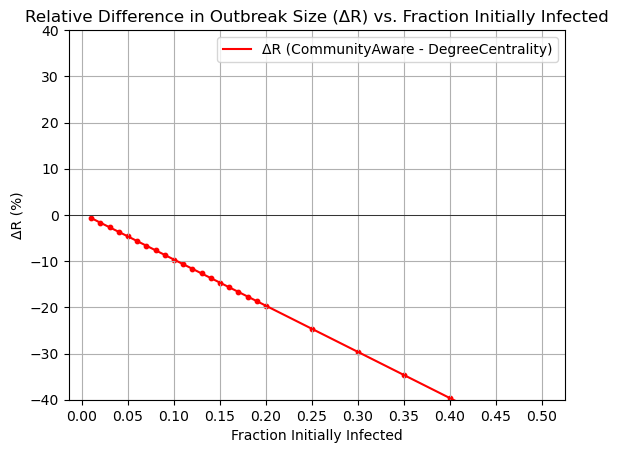

In [58]:
# Function to run simulation and plot results with specific initial infected counts
def plot_sir_simulation_by_count(G, sorted_maps, infection_prob=0.05, recovery_prob=0.05, steps=100):
    results = {name: [] for name in sorted_maps.keys()}
    
    initial_infected_counts = range(0, 201)  # 初始感染节点数从0到200

    for count in initial_infected_counts:
        for name, sorted_map in sorted_maps.items():
            if count > len(G.nodes()):
                results[name].append(0)  # 如果指定的初始感染节点数超过图中的总节点数，直接记录为0
                continue
            top_nodes = [node for node, _ in sorted_map[:count]]
            _, _, infected_counts = SIR_simulation(G, top_nodes, infection_prob, recovery_prob, steps)
            results[name].append(infected_counts[-1] / G.number_of_nodes() * 100)
    
    # 计算 ΔR
    delta_R = [results["CommunityAware"][i] - results["DegreeCentrality"][i] for i in range(len(initial_infected_counts))]

    # 使用插值函数平滑曲线
    interp_func = interp1d(initial_infected_counts, delta_R, kind='cubic')
    smooth_x = np.linspace(min(initial_infected_counts), max(initial_infected_counts), 500)
    smooth_y = interp_func(smooth_x)

    # 绘制 ΔR 曲线
    plt.plot(smooth_x, smooth_y, color='red', label="ΔR (CommunityAware - DegreeCentrality)")
    plt.scatter(initial_infected_counts, delta_R, color='red', s=10)  # 标记原始点

    plt.title('Relative Difference in Outbreak Size (ΔR) vs. Initial Infected Count')
    plt.xlabel('Initial Infected Count')
    plt.ylabel('ΔR (%)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-40, 40)
    plt.xticks(np.arange(0, 201, 20))  # 设置横坐标刻度
    plt.grid(True)
    plt.legend()
    plt.show()

sorted_maps = {
    "CommunityAware": [(node, degree_centrality[node]) for node in ranked_nodes_V5],
    #"CommunityAwareV7": [(node, degree_centrality[node]) for node in ranked_nodes_V7],
    "DegreeCentrality": sorted_centrality,
   # "PageRank": sorted_pagerank,
   # "LeaderRank": sorted_leaderRank,
    #"CommunityBasedCentrality": sorted_community_baseline,
    #"closeness": sorted_closeness
}

# Run simulation and plot
plot_sir_simulation(G, sorted_maps,infection_prob=0.1, recovery_prob=0.557, steps=20)


In [20]:


def leader_rank(G2, damping=0.85, tol=1e-6, max_iter=100):
    # Add the ground node connected to all other nodes
    ground_node = 'ground'
    G = G2.copy()
    G.add_node(ground_node)
    for node in G2.nodes():  # Connect the ground node to all other nodes
        G.add_edge(ground_node, node)
        G.add_edge(node, ground_node)  # Assuming undirected graph, add both directions

    # Create a mapping from node to index
    node_list = list(G.nodes())
    node_index = {node: i for i, node in enumerate(node_list)}
    n = len(node_list)
    
    # Initialize scores to 1 for all nodes
    scores = np.ones(n)
    
    # Create adjacency matrix
    row = []
    col = []
    data = []
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:
            degree = len(neighbors)
            for neighbor in neighbors:
                row.append(node_index[neighbor])
                col.append(node_index[node])
                data.append(1.0 / degree)
    
    adjacency_matrix = csr_matrix((data, (row, col)), shape=(n, n))
    
    # Power iteration: iterate until convergence
    for _ in range(max_iter):
        new_scores = adjacency_matrix.dot(scores)
        if np.linalg.norm(new_scores - scores, 1) < tol:
            break
        scores = new_scores
    
    # Remove the ground node score and normalize the scores
    scores = np.delete(scores, node_index[ground_node])
    total_score = np.sum(scores)
    scores /= total_score
    
    # Create the final scores dictionary
    final_scores = {node_list[i]: scores[i] for i in range(n) if node_list[i] != ground_node}
    
    return final_scores


def calculate_h_index(G):
    h_index = {}
    for node in G.nodes():
        degrees = [G.degree(neighbor) for neighbor in G.neighbors(node)]
        degrees.sort(reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        h_index[node] = h
    return h_index


In [10]:
# Initialize an empty directed graph
# Load the .mtx file
wiki_path = '/Users/qing/Desktop/24s1/comp8880/project/code/data/wiki-Vote.txt'
G_wiki = read_directed_graph(wiki_path,4)
# Calculate number of nodes and edges in the graph
num_nodes = G_wiki.number_of_nodes()
num_edges = G_wiki.number_of_edges()

num_nodes, num_edges

centrality = nx.degree_centrality(G_wiki)
betweenness_manual = nx.betweenness_centrality(G_wiki)
closeness_manual = nx.closeness_centrality(G_wiki)
pagerank = nx.pagerank(G_wiki, alpha=0.85, personalization=None)
leaderRank = leader_rank(G_wiki)
hIndex = calculate_h_index(G_wiki)
kShell = nx.core_number(G_wiki)

sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
sorted_betweenness = sorted(betweenness_manual.items(), key=lambda item: item[1], reverse=True)
sorted_closeness = sorted(closeness_manual.items(), key=lambda item: item[1], reverse=True)
sorted_pagerank =  sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
sorted_leaderRank =  sorted(leaderRank.items(), key=lambda item: item[1], reverse=True)
sorted_hIndex =  sorted(hIndex.items(), key=lambda item: item[1], reverse=True)
sorted_kShell=  sorted(kShell.items(), key=lambda item: item[1], reverse=True)


print(sorted_centrality[:3])
print(sorted_betweenness[:3])
print(sorted_closeness[:3])
print(sorted_pagerank[:3])
print(sorted_leaderRank[:3])
print(sorted_hIndex[:3])
print(sorted_kShell[:3])



# 假设 sorted_centrality, sorted_betweenness 等都是已经计算好并排序的元组列表
data_to_save = {
    "Centrality": sorted_centrality,
    "Betweenness": sorted_betweenness,
    "Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    "LeaderRank": sorted_leaderRank,
    "HIndex": sorted_hIndex,
    "KShell": sorted_kShell
}

with open('saved/network_metrics_wiki.json', 'w') as f:
    json.dump(data_to_save, f, indent=4)


KeyboardInterrupt: 